## Advanced ML, домашнее задание 2

## Константинов Вячеслав

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression

%matplotlib inline

/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 1 Загрузка данных и формирование датасета для России

Загрузка данных и выделение датасета для России с данными, начиная с 3 марта 2020 г:

In [2]:
df = pd.read_csv("./owid-covid-data.csv")

In [3]:
df_rus = df[df.iso_code == 'RUS']
df_rus['date'] = df_rus['date'].astype('datetime64[ns]')
df_rus = df_rus[df_rus.date >= pd.to_datetime("2020-03-03")]
df_rus = df_rus[df_rus.columns[2:]]
df_rus['day'] = np.arange(df_rus.shape[0])

/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
df_rus.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k,day
13450,2020-03-03,3,1,0,0,0.021,0.007,0.0,0.0,NaN,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,0
13451,2020-03-04,4,1,0,0,0.027,0.007,0.0,0.0,NaN,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,1
13452,2020-03-05,4,0,0,0,0.027,0.000,0.0,0.0,46414.0,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,2
13453,2020-03-06,4,0,0,0,0.027,0.000,0.0,0.0,51366.0,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,3
13454,2020-03-07,10,6,0,0,0.069,0.041,0.0,0.0,55688.0,...,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,4


### 2 Аппрокасимация экспонентой

Строим графики целевых переменных

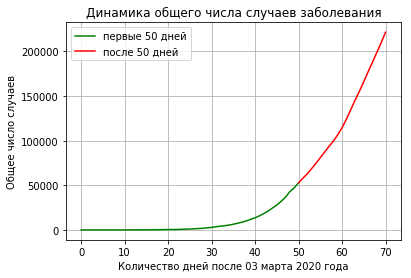

In [40]:
fig, ax = plt.subplots()

plt.plot(df_rus['day'][:51], df_rus['total_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['total_cases'][50:], c='red',   label="после 50 дней")

plt.title("Динамика общего числа случаев заболевания")
plt.ylabel("Общее число случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.grid()
plt.legend()

plt.show()

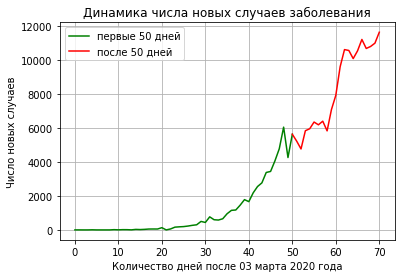

In [70]:
fig, ax = plt.subplots()

plt.plot(df_rus['day'][:51], df_rus['new_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['new_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика числа новых случаев заболевания")
plt.ylabel("Число новых случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.grid()
plt.legend()

plt.show()

### 2а Линейная регрессия

Используя линейную регрессию, обучаем модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня. Для этого обучим регрессию на натуральный логарифм общего числа заболевших, т.е.

$$ \ln(y) = \mathrm{shift} + \beta \cdot \mathrm{day} $$

In [42]:
total_cases_ln = np.log(df_rus[:50].total_cases.values).reshape(-1, 1)
X = df_rus[:50].day.values.reshape(-1, 1)

total_cases_regression = LinearRegression().fit(X, total_cases_ln)

beta, shift = total_cases_regression.coef_[0][0], total_cases_regression.intercept_[0]
print(beta, shift)

0.203280374400196 1.478956569477595


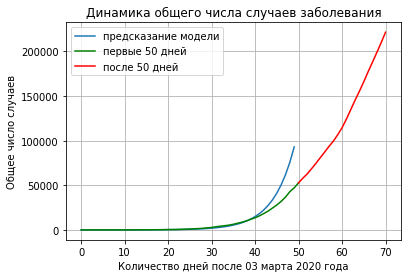

In [43]:
fig, ax = plt.subplots()

plt.plot(X, np.exp(shift + beta*X), label='предсказание модели')
plt.plot(df_rus['day'][:51], df_rus['total_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['total_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика общего числа случаев заболевания")
plt.ylabel("Общее число случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.grid()
plt.legend()

plt.show()

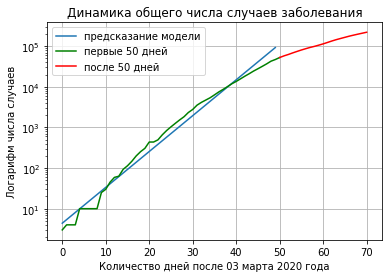

In [44]:
fig, ax = plt.subplots()

plt.plot(X, np.exp(shift + beta*X), label='предсказание модели')
plt.plot(df_rus['day'][:51], df_rus['total_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['total_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика общего числа случаев заболевания")
plt.ylabel("Логарифм числа случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.grid()
plt.legend()
plt.semilogy()

plt.show()

### 2b Апостериорное распределение параметров модели

Дисперсию шума в данных, точнее - логарифма числа новых случаев, оценим из получившейся аппроксимации:

In [45]:
sigma_ln_total_cases_emp = np.sqrt( ((total_cases_ln - shift - beta*X) ** 2).sum() / len(total_cases_ln))
sigma_ln_total_cases_emp

0.3588494786514787

Зададим априорное распределение параметров модели как двухмерное нормальное распределение

In [46]:
mu_beta  = beta
mu_shift = shift

variance_beta = 0.01
variance_shift = 0.05

N = 300

Beta = np.linspace(0.05,0.35,N)
Shift = np.linspace(1.1,1.9,N)

Beta, Shift = np.meshgrid(Beta, Shift)

pos = np.empty(Beta.shape + (2,))
pos[:, :, 0] = Beta; pos[:, :, 1] = Shift

apriori_dist = multivariate_normal([mu_beta, mu_shift], [[variance_beta, 0], [0, variance_shift]])

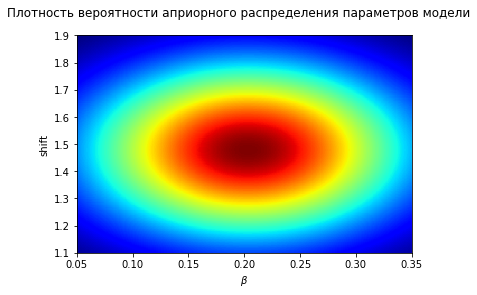

In [47]:
plt.suptitle("Плотность вероятности априорного распределения параметров модели")

plt.xlabel(r"$\beta$")
plt.ylabel("shift")

plt.pcolormesh(Beta, Shift, apriori_dist.pdf(pos), cmap=plt.cm.jet)

plt.show()

Рассчитаем праводподобие для данного датасета:

In [48]:
def likehood(X, y_ln, beta, shift, y_ln_sigma):
    all_p = np.exp(-np.power(y_ln - shift - beta*X, 2) / (2*y_ln_sigma**2) )/np.sqrt(2*np.pi*y_ln_sigma**2)
    return all_p.prod()

In [49]:
likehood_dist = np.empty(Beta.shape)

for idx in np.arange(Beta.shape[0]):
    for idy in np.arange(Beta.shape[1]):
        likehood_dist[idx][idy] = likehood(
            X, 
            total_cases_ln, 
            Beta[idx][idy], 
            Shift[idx][idy], 
            2*sigma_ln_total_cases_emp
        )

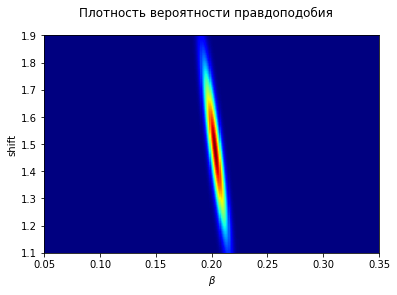

In [50]:
plt.suptitle("Плотность вероятности правдоподобия")

plt.xlabel(r"$\beta$")
plt.ylabel("shift")

plt.pcolormesh(Beta, Shift, likehood_dist, cmap=plt.cm.jet)

plt.show()

aposterioiri_pdf - плотность вероятности апостериорного распределения параметров модели

In [51]:
aposterioiri_pdf = apriori_dist.pdf(pos)*likehood_dist/likehood_dist.sum()

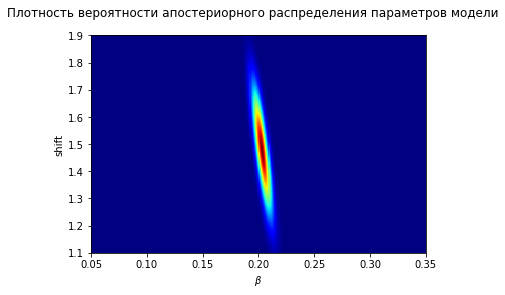

In [52]:
plt.suptitle("Плотность вероятности апостериорного распределения параметров модели")

plt.xlabel(r'$\beta$')
plt.ylabel('shift')

plt.pcolormesh(Beta, Shift, apriori_dist.pdf(pos)*likehood_dist/likehood_dist.sum(), cmap=plt.cm.jet)

plt.show()

Находим наилучшие параметры модели, исходя из апостериорного распределения:

In [53]:
best_i = aposterioiri_pdf.argmax() // N
best_j = aposterioiri_pdf.argmax() - N * best_i

print(best_i, best_j)
print(aposterioiri_pdf[best_i][best_j])
print(Beta[best_i][best_j])
print(Shift[best_i][best_j])

best_beta = Beta[best_i][best_j]
best_shift = Shift[best_i][best_j]

140 153
0.004461469768873053
0.20351170568561872
1.4745819397993312


### 2c Сэмлирование экспонент

In [54]:
num_points = 1000
indices = np.random.choice(
    np.arange(aposterioiri_pdf.size), 
    num_points, 
    p = aposterioiri_pdf.flatten()/aposterioiri_pdf.sum()
)

indices_pair = []
for each_idx in indices:
    line = each_idx // N
    column = each_idx - N * line
    indices_pair.append((line, column))

In [55]:
X_all = df_rus.day.values.reshape(-1, 1)

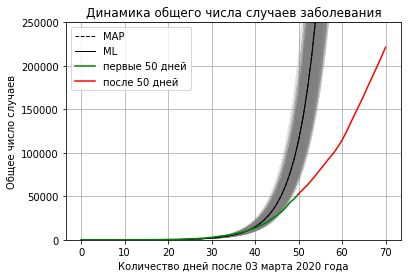

In [56]:
fig, ax = plt.subplots()

for idx in np.arange(num_points):
    i = indices_pair[idx][0]
    j = indices_pair[idx][1]
    cur_beta = Beta[i][j]
    cur_shift = Shift[i][j]
    plt.plot(X_all, np.exp(cur_shift + cur_beta*X_all), lw=0.2, c='grey')
    
plt.plot(X_all, np.exp(best_shift + best_beta*X_all), label='MAP', c = 'black', ls='--', lw=1)
plt.plot(X_all, np.exp(shift + beta*X_all), label='ML',  c = 'black', lw=1)

plt.plot(df_rus['day'][:51], df_rus['total_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['total_cases'][50:], c='red',   label="после 50 дней")

plt.grid()
plt.legend()
plt.ylim((0, 250000))

plt.title("Динамика общего числа случаев заболевания")
plt.ylabel("Общее число случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.show()

Расчёт числа заболевших в модели к 1 мая, 1 июня и 1 сентября:

In [57]:
may_1_idx = 59
june_1_idx = 90
sep_1_idx = 182

may_1_total  = np.zeros(num_points)
june_1_total = np.zeros(num_points)
sep_1_total  = np.zeros(num_points)

for idx in np.arange(num_points):
    i = indices_pair[idx][0]
    j = indices_pair[idx][1]
    cur_beta = Beta[i][j]
    cur_shift = Shift[i][j]
    may_1_total[idx] = np.exp(cur_shift + cur_beta*may_1_idx)
    june_1_total[idx] = np.exp(cur_shift + cur_beta*june_1_idx)
    sep_1_total[idx] = np.exp(cur_shift + cur_beta*sep_1_idx)

In [65]:
print("Число заболевших к 1 мая:", np.exp(shift + beta*may_1_idx))
print("Число заболевших к 1 июня:", np.exp(shift + beta*june_1_idx))
print("Число заболевших к 1 сентября:", np.exp(shift + beta*sep_1_idx))

Число заболевших к 1 мая: 709629.7677139881
Число заболевших к 1 июня: 387098703.19679487
Число заболевших к 1 сентября: 5.127525696244218e+16


Строим предсказательные распределения:

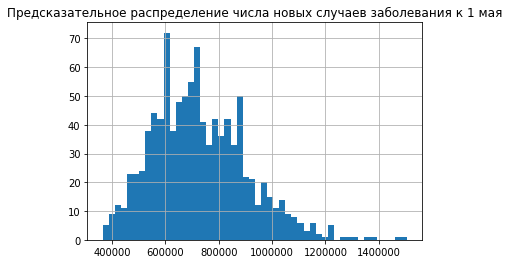

In [59]:
plt.title("Предсказательное распределение общего числа заболевших к 1 мая")
plt.hist(may_1_total, bins=50)
plt.grid()
plt.show()

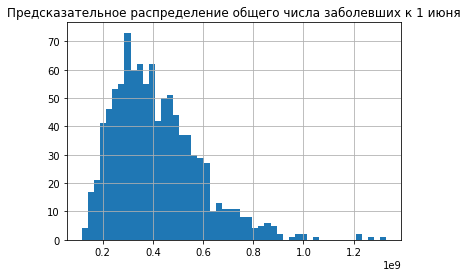

In [60]:
plt.title("Предсказательное распределение общего числа заболевших к 1 июня")
plt.hist(june_1_total, bins=50)
plt.grid()
plt.show()

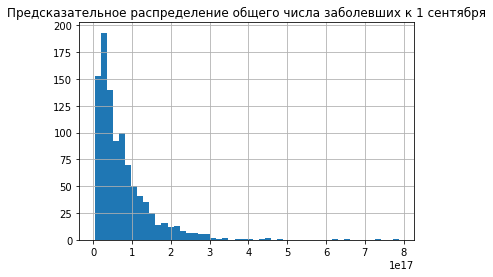

In [61]:
plt.title("Предсказательное распределение общего числа заболевших к 1 сентября")
plt.hist(sep_1_total, bins=50)
plt.grid()
plt.show()

### 3 Аппроксимация сигмоидой

### 3a Применение  линейной регрессии

Для аппроксимации кривой общего числа заболевших воспользуемся данными по числу ежедневных новых заболеваний. Число новых заболеваний должно аппроксимироваться функцией плотности вероятности гауссовского распределения, то есть экспонентой от квадратичной функции номера дня. Таким образом, аппроксимация общего числа заболеваний сигмоидой экивалентна аппроксимациии числа новых заболеваний экспонентой от квадратичной функции номера дня. 


$$
    \mathrm{new~cases} = \exp (a + b \cdot \mathrm{day} + c \cdot \mathrm{day}^2)
$$

### 3b Применение  линейной регрессии

In [66]:
#преобразование вектора дней в вектор вида (1, x, x2)
def tranform_2(x):
    return np.concatenate((np.ones((len(x), 1)), x.reshape(-1, 1), (x ** 2).reshape(-1, 1)), axis=1)

#подготовка данных
y = df_rus[(df_rus.new_cases > 0) & (df_rus.day < 50)].new_cases.values
ln_y = np.log(y).reshape(-1, 1)

x = df_rus[(df_rus.new_cases > 0) & (df_rus.day < 50)].day.values
X = tranform_2(x)

In [67]:
#регрессия
new_cases_regression = LinearRegression(fit_intercept=False).fit(X, ln_y)

In [68]:
w = new_cases_regression.coef_[0]
print(w)

[-0.0017397   0.24231206 -0.0013381 ]


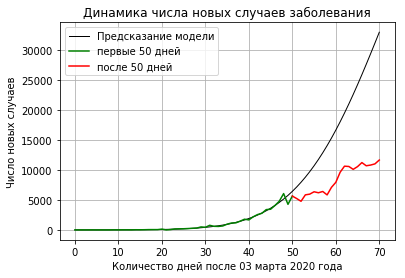

In [73]:
fig, ax = plt.subplots()

days = df_rus['day'].values.reshape(-1, 1)
new_cases = np.exp(tranform_2(days)@w)

plt.plot(days, new_cases,  c = 'black', lw=1, label="Предсказание модели")

plt.plot(df_rus['day'][:51], df_rus['new_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['new_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика числа новых случаев заболевания")
plt.ylabel("Число новых случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.grid()
plt.legend()

plt.show()

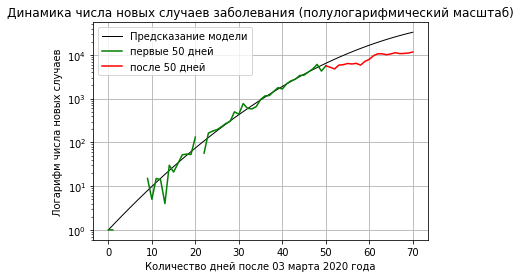

In [74]:
fig, ax = plt.subplots()

days = df_rus['day'].values.reshape(-1, 1)
new_cases = np.exp(tranform_2(days)@w)

plt.plot(days, new_cases,  c = 'black', lw=1, label="Предсказание модели")

plt.plot(df_rus['day'][:51], df_rus['new_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['new_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика числа новых случаев заболевания (полулогарифмический масштаб)")
plt.ylabel("Логарифм числа новых случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.grid()
plt.legend()
plt.semilogy()

plt.show()

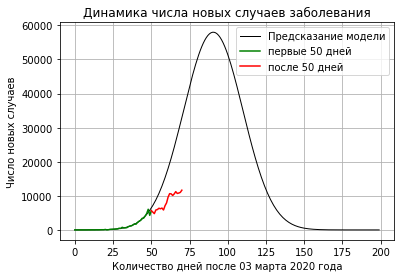

In [76]:
fig, ax = plt.subplots()

days = np.arange(200).reshape(-1, 1)
new_cases = np.exp(tranform_2(days)@w)

plt.plot(days, new_cases,  c = 'black', lw=1, label="Предсказание модели")

plt.plot(df_rus['day'][:51], df_rus['new_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['new_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика числа новых случаев заболевания")
plt.ylabel("Число новых случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.grid()
plt.legend()

plt.show()

In [78]:
#функция расчёта общего числа заболевших
#как сумма чисел заболевших в первые x дней
#после 03 марта 2020 года
def total_cases_pred(x, w):
    days = np.arange(x)
    return np.exp(tranform_2(days)@w).sum()

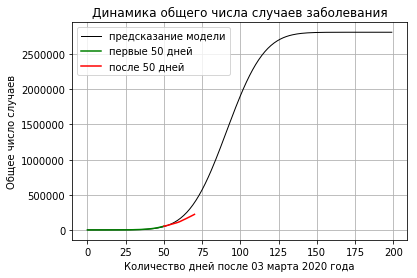

In [80]:
n_days = 200
total_cases_new = np.zeros(n_days)
for idx in np.arange(n_days):
    total_cases_new[idx] = total_cases_pred(idx, w)

fig, ax = plt.subplots()
    
plt.plot(np.arange(n_days), total_cases_new,  c = 'black', lw=1, label='предсказание модели')
plt.plot(df_rus['day'][:51], df_rus['total_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['total_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика общего числа случаев заболевания")
plt.ylabel("Общее число случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")

plt.grid()
plt.legend()

plt.show()

In [81]:
print("Максимальное число заболевших согласно модели:", total_cases_new[-1])

Максимальное число заболевших согласно модели: 2810077.0312947906


### 3b Расчёт апостериорного распределения

Расчёт априорного распределения параметров модели. Считаем, что они распределены согласно трехмерному распределению Гаусса:

In [82]:
mu = list(w)

variance_a = 0.000001
variance_b = 0.00005
variance_c = 0.000001

sigma0 = [
    [variance_a, 0, 0],
    [0, variance_b, 0],
    [0, 0, variance_c]
]

N = 100

a = np.linspace(-0.002,0.000,N)
b = np.linspace( 0.22,  0.27,  N)
c = np.linspace(-0.0035,0.001,N)

A, B, C = np.meshgrid(a, b, c, indexing='ij')

pos = np.empty(A.shape + (3,))
pos[:, :, :, 0] = A; pos[:, :, :, 1] = B; pos[:, :, :, 2] = C; 

apriori_dist = multivariate_normal(mu, sigma0)

Строим графики по двум последним регрессорам, первый регрессор отвечает за масштабирование.

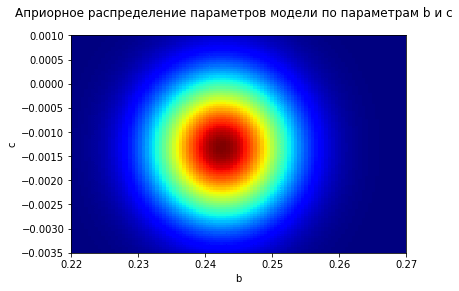

In [83]:
plt.suptitle("Априорное распределение параметров модели по параметрам b и c")

plt.xlabel("b")
plt.ylabel("c")

#7-ой элемент соответствует плюс-минус наилучшему значению первого регрессора
plt.pcolormesh(B[7], C[7], apriori_dist.pdf(pos)[7], cmap=plt.cm.jet)

plt.show()

In [84]:
#расчёт диспрерсии логарифма новых случаев

sigma_ln_new_cases_emp = np.sqrt(((ln_y.flatten() - X@w) ** 2).sum() / len(ln_y))
sigma_ln_new_cases_emp

0.36110034913148115

In [85]:
#функция расчёта правдоподобия
def likehood2(X, y_ln, w, y_ln_sigma):
    all_p = np.exp(-np.power(y_ln - X@w, 2) / (2*y_ln_sigma**2) )/np.sqrt(2*np.pi*y_ln_sigma**2)
    return all_p.prod()

In [86]:
likehood2(X, ln_y.flatten(), w, sigma_ln_new_cases_emp)

3.340422584981816e-08

Рассчитываем распределение правдоподобия:

In [87]:
likehood_dist = np.empty(A.shape)

for idx in np.arange(A.shape[0]):
    for idy in np.arange(A.shape[1]):
        for idz in np.arange(A.shape[2]):
            likehood_dist[idx][idy][idz] = likehood2(
                X, 
                ln_y.flatten(), 
                np.asarray([A[idx][idy][idz], B[idx][idy][idz], C[idx][idy][idz]]),
                sigma_ln_new_cases_emp
            )

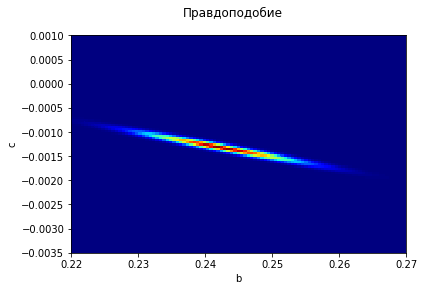

In [88]:
plt.suptitle("Правдоподобие")

plt.xlabel("b")
plt.ylabel("c")

plt.pcolormesh(B[7], C[7], likehood_dist[7], cmap=plt.cm.jet)

plt.show()

In [89]:
#плотность вероятности апостериорного распределения
aposterioiri_pdf = apriori_dist.pdf(pos)*likehood_dist/likehood_dist.sum()

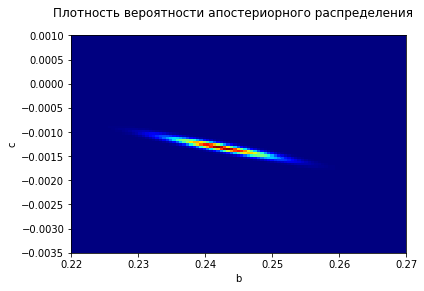

In [90]:
plt.suptitle("Плотность вероятности апостериорного распределения")

plt.xlabel("b")
plt.ylabel("c")

plt.pcolormesh(B[7], C[7], aposterioiri_pdf[7], cmap=plt.cm.jet)

plt.show()

Находим параметры модели, соответствующие максимуму апостериорного распределения:

In [91]:
best_a =  aposterioiri_pdf.argmax() // (N **2)
best_b = (aposterioiri_pdf.argmax() - best_a * (N ** 2)) // N
best_c =  aposterioiri_pdf.argmax() - best_a * (N ** 2) - best_b * N

print(best_a, best_b, best_c)
print(aposterioiri_pdf[best_a][best_b][best_c])

#print(A[best_a][best_b][best_c])
#print(B[best_a][best_b][best_c])
#print(C[best_a][best_b][best_c])

best_w = np.asarray([
    A[best_a][best_b][best_c],
    B[best_a][best_b][best_c],
    C[best_a][best_b][best_c]
])

print(best_w)

13 43 48
917.9144797266372
[-0.00173737  0.24171717 -0.00131818]


### 3c Сэмплирование сигмоид

In [92]:
num_points = 100
indices = np.random.choice(
    np.arange(aposterioiri_pdf.size), 
    num_points, 
    p = aposterioiri_pdf.flatten()/aposterioiri_pdf.sum()
)

  
indices_pair = []
for each_idx in indices:
    aa =  each_idx // (N **2)
    bb = (each_idx - aa * (N ** 2)) // N
    cc =  each_idx - aa * (N ** 2) - bb * N

    w_new = np.asarray([
        A[aa][bb][cc],
        B[aa][bb][cc],
        C[aa][bb][cc]
    ])
    
    indices_pair.append(w_new)

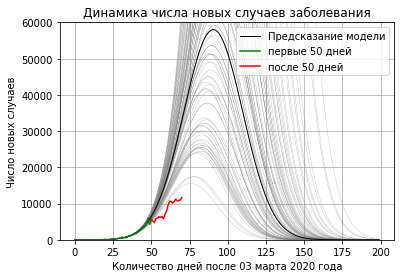

In [94]:
fig, ax = plt.subplots()

days = np.arange(200).reshape(-1, 1)

for ww in indices_pair:
    plt.plot(days, np.exp(tranform_2(days)@ww), lw=0.2, c='grey')

new_cases = np.exp(tranform_2(days)@w)

plt.plot(days, new_cases,  c = 'black', lw=1, label="Предсказание модели")
plt.plot(df_rus['day'][:51], df_rus['new_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['new_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика числа новых случаев заболевания")
plt.ylabel("Число новых случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")


plt.grid()
plt.legend()
plt.ylim((0, 60000))

plt.show()

Как видно из графика, даже при небольшой дисперсии параметров, модель даём сильно различающиеся предсказания.

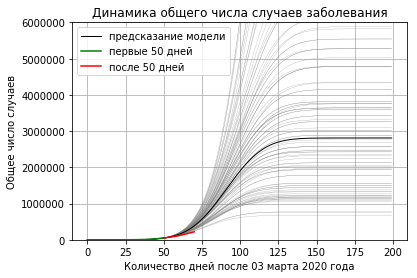

In [95]:
fig, ax = plt.subplots()
n_days = 200
max_cases = []

for ww in indices_pair:
    total_cases_new = np.zeros(n_days)
    for idx in np.arange(n_days):
        total_cases_new[idx] = total_cases_pred(idx, ww)

    plt.plot(np.arange(n_days), total_cases_new, lw=0.2, c='grey')
    max_cases.append(total_cases_new[-1])

total_cases_new = np.zeros(n_days)
for idx in np.arange(n_days):
    total_cases_new[idx] = total_cases_pred(idx, w)

plt.plot(np.arange(n_days), total_cases_new,  c = 'black', lw=1, label='предсказание модели')
plt.plot(df_rus['day'][:51], df_rus['total_cases'][:51], c='green', label="первые 50 дней")
plt.plot(df_rus['day'][50:], df_rus['total_cases'][50:], c='red', label="после 50 дней")

plt.title("Динамика общего числа случаев заболевания")
plt.ylabel("Общее число случаев")
plt.xlabel("Количество дней после 03 марта 2020 года")


plt.grid()
plt.legend()
plt.ylim((0, 0.6e7))

plt.show()

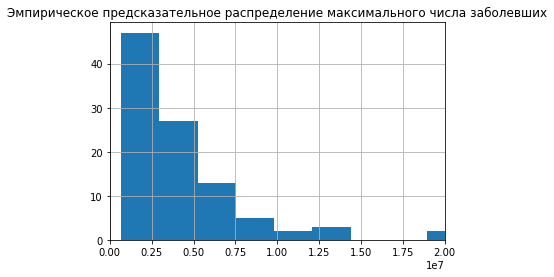

In [96]:
plt.title("Эмпирическое предсказательное распределение максимального числа заболевших")
plt.hist(max_cases, bins=10)
plt.xlim((0, 2e7))
plt.grid()
plt.show()

In [100]:
print("Среднее прогнозируемое число заболевших:", int(np.mean(max_cases)))

print("Оптимистичный сценарий,  10-й процентиль числа заболевших:", int(np.quantile(max_cases, 0.1)))
print("Пессимистичный сценарий, 90-й процентиль числа заболевших:", int(np.quantile(max_cases, 0.9)))

Среднее прогнозируемое число заболевших: 4321062
Оптимистичный сценарий,  10-й процентиль числа заболевших: 1180436
Пессимистичный сценарий, 90-й процентиль числа заболевших: 8878127


### 4 Анализ других стран

### 4а Португалия

Выполним аппроксимацию сигмоидой, т.к. она лучше описывает динамику роста целевых переменных.

In [101]:
df_pt = df[(df.location == "Portugal") & (df.total_cases > 0 )]
df_pt['day'] = np.arange(df_pt.shape[0])

/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [102]:
df_pt.head(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k,day
12810,PRT,Portugal,2020-03-03,2,2,0,0,0.196,0.196,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,0
12811,PRT,Portugal,2020-03-04,4,2,0,0,0.392,0.196,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,1
12812,PRT,Portugal,2020-03-05,5,1,0,0,0.490,0.098,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,2
12813,PRT,Portugal,2020-03-06,9,4,0,0,0.883,0.392,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,3
12814,PRT,Portugal,2020-03-07,13,4,0,0,1.275,0.392,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,4
12815,PRT,Portugal,2020-03-08,21,8,0,0,2.059,0.785,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,5
12816,PRT,Portugal,2020-03-09,30,9,0,0,2.942,0.883,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,6
12817,PRT,Portugal,2020-03-10,39,9,0,0,3.825,0.883,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,7
12818,PRT,Portugal,2020-03-11,41,2,0,0,4.021,0.196,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,8
12819,PRT,Portugal,2020-03-12,59,18,0,0,5.786,1.765,0.0,...,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,9


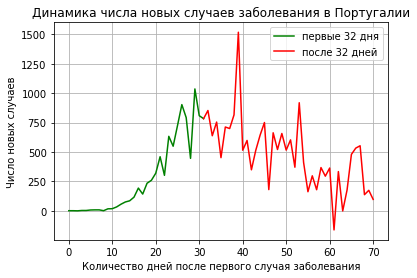

In [110]:
n_train_days = 32

fig, ax = plt.subplots()

plt.plot(df_pt['day'][:n_train_days], df_pt['new_cases'][:n_train_days], c='green', label='первые 32 дня')
plt.plot(df_pt['day'][n_train_days-1:], df_pt['new_cases'][n_train_days-1:], c='red', label='после 32 дней')

plt.title("Динамика числа новых случаев заболевания в Португалии")
plt.ylabel("Число новых случаев")
plt.xlabel("Количество дней после первого случая заболевания")

plt.grid()
plt.legend()

plt.show()

Следует заметить, что модель сильно зависит от того, сколько дней взято в обучающую выборку.

Обучение параметров экспоненты, аналогично данным России:

In [108]:
y = df_pt[(df_pt.new_cases > 0) & (df_pt.day < n_train_days)].new_cases.values
ln_y = np.log(y).reshape(-1, 1)

x = df_pt[(df_pt.new_cases > 0) & (df_pt.day < n_train_days)].day.values
X = tranform_2(x)
portugal_regression = LinearRegression(fit_intercept=False).fit(X, ln_y)

w = portugal_regression.coef_[0]
print(w)

[-0.07133194  0.39115217 -0.00531565]


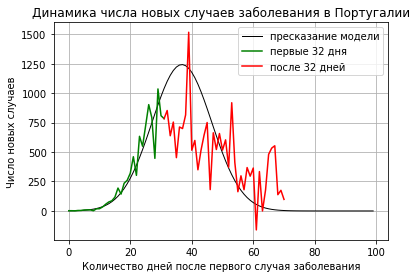

In [109]:
fig, ax = plt.subplots()

days = np.arange(100).reshape(-1, 1)
new_cases = np.exp(tranform_2(days)@w)

plt.plot(days, new_cases,  c = 'black', lw=1, label='пресказание модели')

plt.plot(df_pt['day'][:n_train_days], df_pt['new_cases'][:n_train_days], c='green', label='первые 32 дня')
plt.plot(df_pt['day'][n_train_days-1:], df_pt['new_cases'][n_train_days-1:], c='red', label='после 32 дней')

plt.title("Динамика числа новых случаев заболевания в Португалии")
plt.ylabel("Число новых случаев")
plt.xlabel("Количество дней после первого случая заболевания")

plt.grid()
plt.legend()

plt.show()

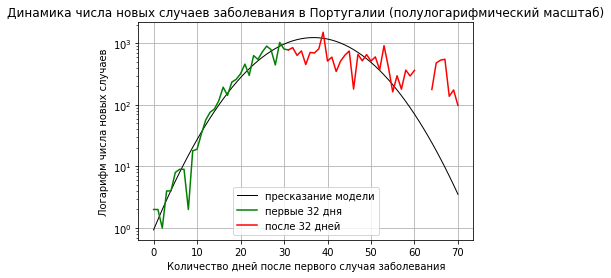

In [113]:
fig, ax = plt.subplots()

days = df_pt['day'].values.reshape(-1, 1)
new_cases = np.exp(tranform_2(days)@w)


plt.plot(days, new_cases,  c = 'black', lw=1, label='пресказание модели')

plt.plot(df_pt['day'][:n_train_days], df_pt['new_cases'][:n_train_days], c='green', label='первые 32 дня')
plt.plot(df_pt['day'][n_train_days-1:], df_pt['new_cases'][n_train_days-1:], c='red', label='после 32 дней')

plt.title("Динамика числа новых случаев заболевания в Португалии (полулогарифмический масштаб)")
plt.ylabel("Логарифм числа новых случаев")
plt.xlabel("Количество дней после первого случая заболевания")

plt.grid()
plt.legend()
plt.semilogy()

plt.show()

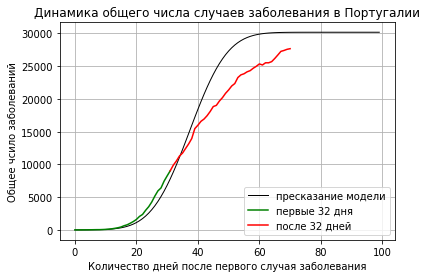

In [115]:
n_days = 100
total_cases_new = np.zeros(n_days)
for idx in np.arange(n_days):
    total_cases_new[idx] = total_cases_pred(idx, w)

fig, ax = plt.subplots()
    
plt.plot(np.arange(n_days), total_cases_new,  c = 'black', lw=1, label='пресказание модели')

plt.plot(df_pt['day'][:n_train_days], df_pt['total_cases'][:n_train_days], c='green', label='первые 32 дня')
plt.plot(df_pt['day'][n_train_days-1:], df_pt['total_cases'][n_train_days-1:], c='red', label='после 32 дней')

plt.title("Динамика общего числа случаев заболевания в Португалии")
plt.ylabel("Общее чсило заболеваний")
plt.xlabel("Количество дней после первого случая заболевания")

plt.grid()
plt.legend(loc=4)

plt.show()

In [117]:
print("Максимальное число заболевших в Португалии согласно модели:", int(total_cases_new[-1]))

Максимальное число заболевших в Португалии согласно модели: 30189


Применим описанных подход для тех стран, у которых после первого случая в течение n_train_days дней было не менее 10 дней, в которых регистрировали новые случаи. Пробуем обучить при n_train_days = 32, 40 и 50 дней.

/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


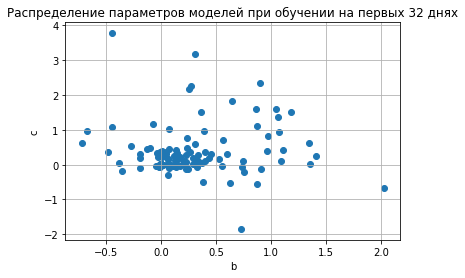

In [119]:
n_train_days = 32
locations = df.location.unique()
regression_w = []
countries = []

for each_country in locations:
    df_country = df[(df.location == each_country) & (df.total_cases > 0)]
    df_country['day'] = np.arange(df_country.shape[0])
    
    cur_y = df_country[(df_country.new_cases > 0) & (df_country.day < n_train_days)].new_cases.values
    
    if(cur_y.size > 10):
        cur_y_ln = np.log(cur_y).reshape(-1, 1)

        cur_x = df_country[(df_country.new_cases > 0) & (df_country.day < n_train_days)].day.values
        cur_X = tranform_2(cur_x)
        country_regression = LinearRegression(fit_intercept=False).fit(cur_X, cur_y_ln)

        regression_w.append( country_regression.coef_[0])
        countries.append(each_country)
        
b, c = np.asarray(regression_w).reshape(3, -1)[1], np.asarray(regression_w).reshape(3, -1)[2]

fig, ax = plt.subplots()
plt.title("Распределение параметров моделей при обучении на первых 32 днях")
plt.scatter(b, c)
plt.xlabel("b")
plt.ylabel("c")

plt.grid()
plt.show()

/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


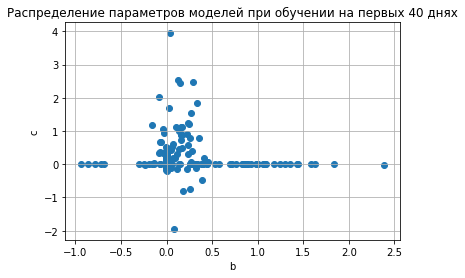

In [120]:
n_train_days = 40
locations = df.location.unique()
regression_w = []
countries = []

for each_country in locations:
    df_country = df[(df.location == each_country) & (df.total_cases > 0)]
    df_country['day'] = np.arange(df_country.shape[0])
    
    cur_y = df_country[(df_country.new_cases > 0) & (df_country.day < n_train_days)].new_cases.values
    
    if(cur_y.size > 10):
        cur_y_ln = np.log(cur_y).reshape(-1, 1)

        cur_x = df_country[(df_country.new_cases > 0) & (df_country.day < n_train_days)].day.values
        cur_X = tranform_2(cur_x)
        country_regression = LinearRegression(fit_intercept=False).fit(cur_X, cur_y_ln)

        regression_w.append( country_regression.coef_[0])
        countries.append(each_country)
        
b, c = np.asarray(regression_w).reshape(3, -1)[1], np.asarray(regression_w).reshape(3, -1)[2]

fig, ax = plt.subplots()
plt.title("Распределение параметров моделей при обучении на первых 40 днях")
plt.scatter(b, c)
plt.xlabel("b")
plt.ylabel("c")

plt.grid()
plt.show()

/home/placetexperiri/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


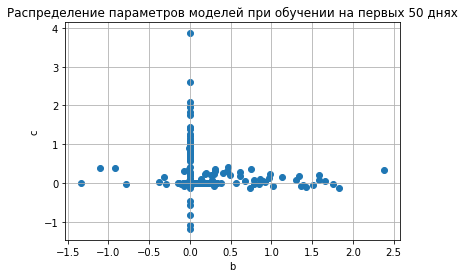

In [121]:
n_train_days = 50
locations = df.location.unique()
regression_w = []
countries = []

for each_country in locations:
    df_country = df[(df.location == each_country) & (df.total_cases > 0)]
    df_country['day'] = np.arange(df_country.shape[0])
    
    cur_y = df_country[(df_country.new_cases > 0) & (df_country.day < n_train_days)].new_cases.values
    
    if(cur_y.size > 10):
        cur_y_ln = np.log(cur_y).reshape(-1, 1)

        cur_x = df_country[(df_country.new_cases > 0) & (df_country.day < n_train_days)].day.values
        cur_X = tranform_2(cur_x)
        country_regression = LinearRegression(fit_intercept=False).fit(cur_X, cur_y_ln)

        regression_w.append( country_regression.coef_[0])
        countries.append(each_country)
        
b, c = np.asarray(regression_w).reshape(3, -1)[1], np.asarray(regression_w).reshape(3, -1)[2]

fig, ax = plt.subplots()
plt.title("Распределение параметров моделей при обучении на первых 50 днях")
plt.scatter(b, c)
plt.xlabel("b")
plt.ylabel("c")

plt.grid()
plt.show()

Страны можно раздедлить на зоны: при обучении на первых 32-х днях есть вытянутое вдоль оси Ос ядро и его окружения. Когда оба регрессора положительны, то это соответствует экспоненциальному, взрывному росту, без замедления. При обучении на большем количестве дней распредление смещается в строну отрицательных значений регрессоров, что соответствуем замедлению роста и вырождается в "крест". Распределение отражает то, что страны переносят эпидемию с запозданием.

### 5 Анализ полученных результатов

- Экспонента - это не лучший способ аппроксимации, сигмоида описывает рост числа заболевших гораздо лучше;
- Максимальное число заболевших очень сильно коррелирует с параметрами экспоненты, которая описывает число новых случаев. Параметры экспоненты зависят от параметров распространения эпидемии, поэтому можно сделать вывод, что любое уменьшение скорости значительно повлияет на максимальное число заболевших;
- Решение о целесообразности введения каратина можно оценить исходя из максимального числа новых заболевших за один день и аналогичного распределения для числа выздоровевших. Это позволить оценить нагрузку на систему здравоохранения и оценить таким параметры, при которых числов пациентов каждый день эпидемии не будет превышать максимального числа коек в больницах.